In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [123]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')

In [124]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [126]:
df.columns = ['Sales']

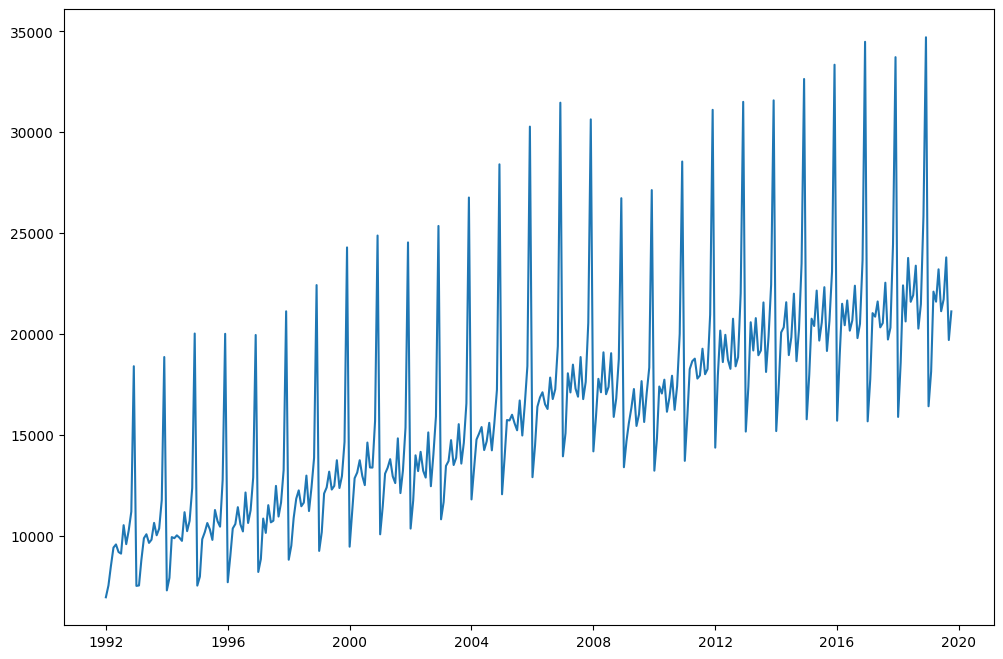

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(df)

In [128]:
len(df)

334

In [129]:
len(df) - 18

316

In [130]:
test_size = 18
test_ind = len(df) - test_size

In [131]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [132]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
scaler.fit(train)

MinMaxScaler()

In [136]:
scaled_train = scaler.transform(train)

In [137]:
scaled_test = scaler.transform(test)

In [138]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [139]:
len(test)

18

In [140]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [141]:
X,y = generator[0]

In [142]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [143]:
y

array([[0.02047633]])

In [144]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [145]:
len(X[0]) #given the length of 12 months, predict the 13th month

12

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [147]:
n_features = 1

In [148]:
model = Sequential()

In [149]:
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [152]:
val_gen = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [153]:
model.fit(generator, epochs=20, validation_data=val_gen, callbacks=[early_stop])

Epoch 1/20


 58/304 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0550

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0330 - val_loss: 0.0099
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - val_loss: 0.0049
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - val_loss: 0.0028
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 9.0251e-04
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 0.0013


In [154]:
losses = pd.DataFrame(model.history.history)

<Axes: >

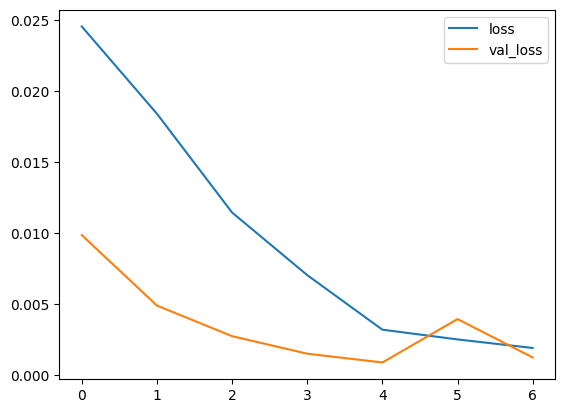

In [155]:
losses.plot()

In [156]:
test_preds = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [157]:
true_preds = scaler.inverse_transform(test_preds)

In [158]:
test['Preds'] = true_preds

C:\Users\didig\AppData\Local\Temp\ipykernel_1924\1821251132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Preds'] = true_preds


In [159]:
test

,Sales,Preds
DATE,,
2018-05-01,23764,20464.991747
2018-06-01,21589,19693.080962
2018-07-01,21919,19922.958844
2018-08-01,23381,21322.064226
2018-09-01,20260,19424.676946
2018-10-01,21473,19935.190705
2018-11-01,25831,22921.652771
2018-12-01,34706,31183.449403
2019-01-01,16410,15998.709285


<Axes: xlabel='DATE'>

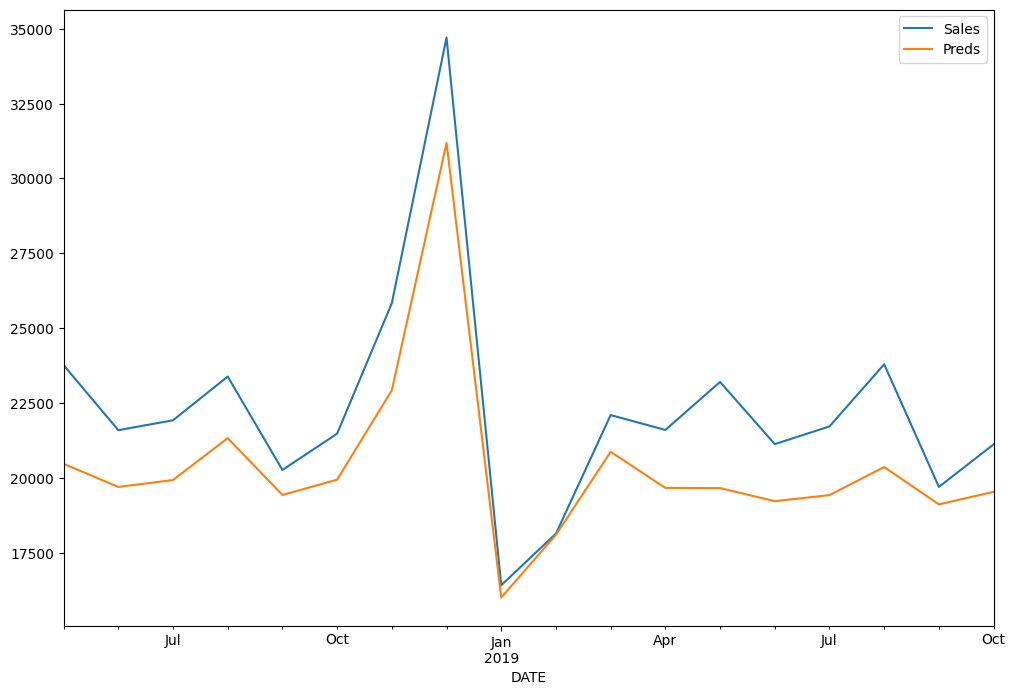

In [160]:
test.plot(figsize=(12, 8))

In [161]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [162]:
length = 12

In [163]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [164]:
model = Sequential()
model.add(LSTM(100,activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\didig\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [174]:
model.fit(generator, epochs=4)

Epoch 1/4


322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016
Epoch 2/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014
Epoch 3/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 4/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011  


In [175]:
forecast = []
periods = 12 #should typically be equal to the initial batch length

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [176]:
forecast = scaler.inverse_transform(forecast)

In [177]:
forecast_ind = pd.date_range(start='2019-11-01', periods=periods, freq='MS')

In [178]:
forecast_ind

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [179]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_ind, columns=['Forecast'])

In [180]:
forecast_df

,Forecast
2019-11-01,21932.951317
2019-12-01,20997.275115
2020-01-01,21194.285156
2020-02-01,22623.602849
2020-03-01,20629.488564
2020-04-01,21134.044411
2020-05-01,24020.154488
2020-06-01,31215.113842
2020-07-01,17662.271915
2020-08-01,19736.074299


<Axes: >

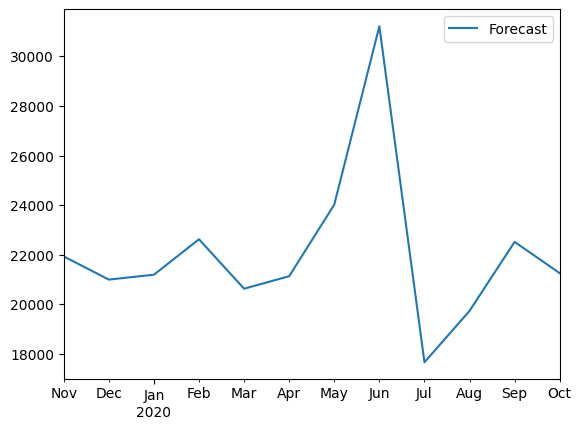

In [181]:
forecast_df.plot()

(576.0, 611.0)

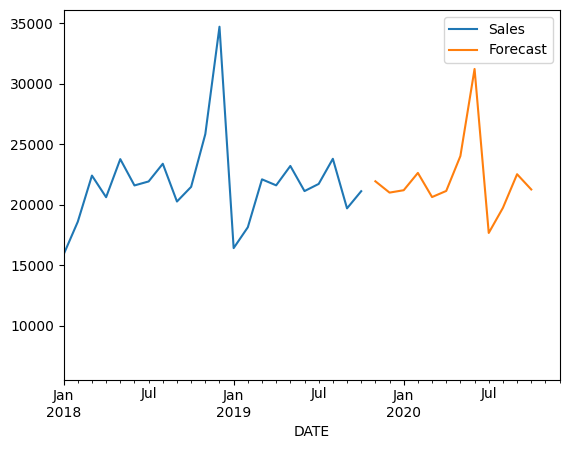

In [182]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-10', '2020-12-01')